# Superhero Visualization

### Within this project, I used data collected and cleaned by the [FiveThirtyEight](https://fivethirtyeight.com/features/women-in-comic-books/#fn-2) and the INFO Department at the University of Colorado - Boulder, to explore several questions ranging between gender/sexuality representation and trends with living status of characters based off introduction year. All data is stored within superheroData.csv. 

In [9]:
# Here, I am importing the Pandas, Numpy, and Matplotlib libraries and initializing them to smaller names. With 
# '%matplotlib inline', I am focused on insuring that the data visualizations I write are shown within the cells
# of the Jupyter IDE cells, rather than being downloaded as their own seperate PNG files. Finally, I set the visual
# plots of each visualization to have the dimensions of (10, 8).

import pandas as pan
import numpy as npy
import matplotlib.pyplot as plot
%matplotlib inline
plot.rcParams["figure.figsize"] = (12, 10)

In [10]:
# Here, I am initializing a variable to use the Pandas function to open the CSV file within our folder titled
# 'superheroData.csv'. By initializing this variable, I can call it throughout the program to manipulate the data
# I wish to see.

superHero = pan.read_csv("superheroData.csv")

## THEME 1: Gender and Sexuality in the Marvel and DC Universes
### Within this theme, I explore two questions: 1) What is the breakdown for when non-cisgendered characters were introduced throughout the two universes, and 2) What is the breakdown for when non-heterosexual characters were introduced throughout the two universes? 

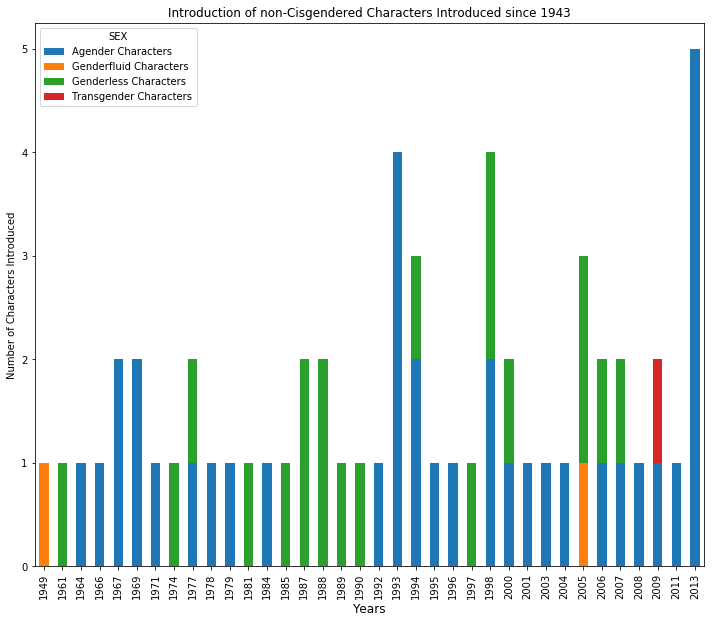

In [11]:
# With a few nested variables, I manipulate my superHero variable from the beginning of the program to drop all 'ND', 
# 'Male Characters', and 'Female Characters' from the SEX column as to not show non-cisgendered categories in the data.
sex_noND = superHero.drop(superHero[superHero.SEX == "ND"].index)
sex_noMale = sex_noND.drop(sex_noND[sex_noND.SEX == "Male Characters"].index)
sex_noFemale = sex_noMale.drop(sex_noMale[sex_noMale.SEX == "Female Characters"].index)

# With the following variable, I reuse the superHero variablef rom earlier to drop all 'ND' values from the FIRST_YEAR
# column of the data as to not have a skewed list of results. 
year_noND = superHero.drop(superHero[superHero.FIRST_YEAR == "ND"].index)

# With the 'gender' variable, I use a Pandas crosstab function to analyze the two variables I initialized earlier in
# this cell. Afterwards, I use the Matplotlibs function to create a plot and set it to a stacked bar graph. Finally,
# Finally, I label the x and y axes and show the final plot result. 
gender = pan.crosstab(index = year_noND["FIRST_YEAR"], columns = [sex_noFemale["SEX"]])
gender.plot(kind = 'bar', stacked = True)
plot.title("Introduction of non-Cisgendered Characters Introduced since 1943")
plot.xlabel("Years", fontsize = 12)
plot.ylabel("Number of Characters Introduced")
plot.show()

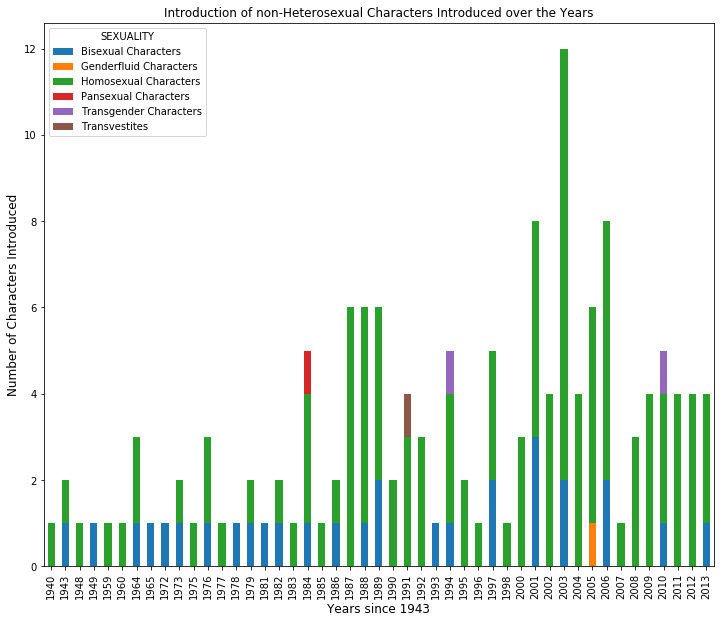

In [12]:
# With a couple of nested variables, I use the superHero variable to drop all 'ND' and 'Heterosexual Characters' values
# from the SEXUALITY column of our CSV file as to not show any heterosexual categories in the data.
sexuality_noND = superHero.drop(superHero[superHero.SEXUALITY == "ND"].index)
sexuality_noHetero = sexuality_noND.drop(sexuality_noND[sexuality_noND.SEXUALITY == "Heterosexual Characters"].index)

# With this variable, I reuse the superHero variable to drop all 'ND' values from the FIRST_YEAR column as to not have
# any skewed data in the final product. 
year_noND = superHero.drop(superHero[superHero.FIRST_YEAR == "ND"].index)

# Within the 'sexuality' variable, I use the Pandas crosstab to analyze my two variables from earlier in this cell. 
# Afterwards, I use the Matplotlib function to create a visualization of the 'sexuality' crosstab variable and create
# another stacked bar graph. Finally, I label all axes and show the visualization.
sexuality = pan.crosstab(year_noND["FIRST_YEAR"], sexuality_noHetero["SEXUALITY"])
sexuality.plot(kind = 'bar', stacked = True)
plot.title("Introduction of non-Heterosexual Characters Introduced over the Years")
plot.xlabel("Years since 1943", fontsize = 12)
plot.ylabel("Number of Characters Introduced", fontsize = 12)
plot.show()

## THEME 2: Abnormal Eye Colors and Leanings amongst Comic Book Characters 
### Within this theme, I hope to explore the breakdown of how eye color is normally associated with the leanings of superheros between the Marvel and DC universes. I explore how two normal eye colors (blue and brown) and two abnormal eye colors (red and yellow) are normally associated with the comic book characters alignings. 

/Users/joshuapaup/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


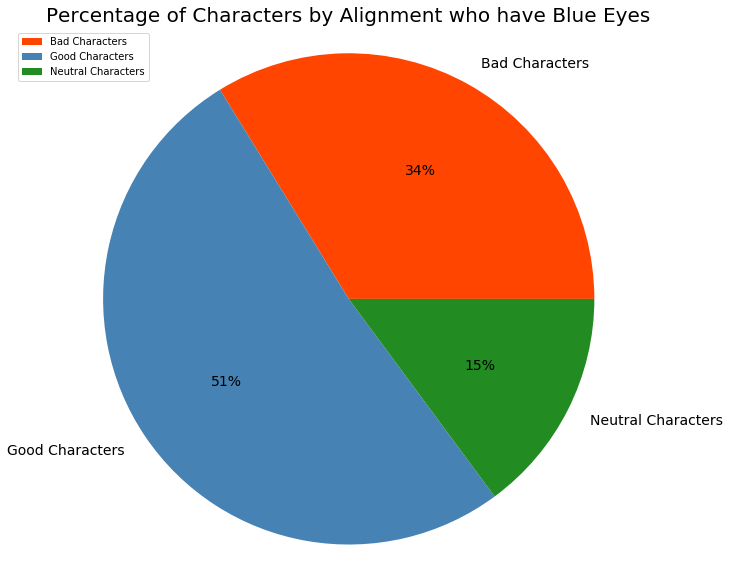

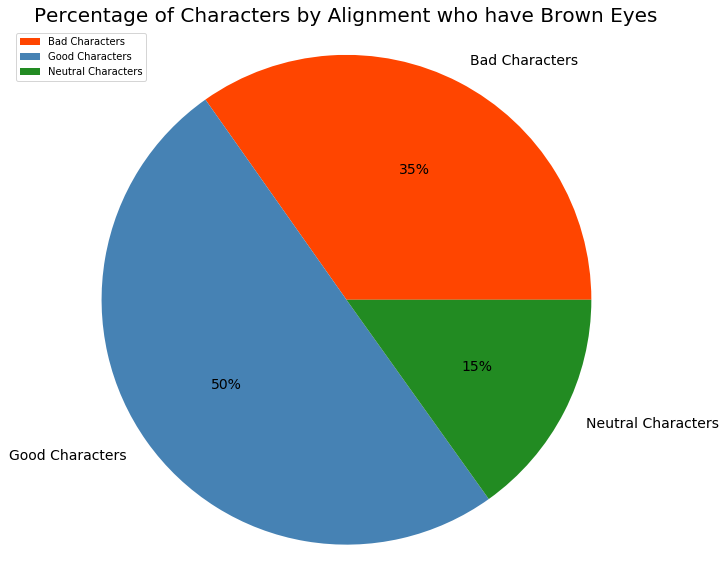

In [13]:
# Using several variables, I manipulate the superHero variable from the beginning of the program to create two seperate
# lists that is compiled of data that only has Blue eyes and Brown eyes. Afterwards, I will use more variables to drop
# additional information across the ALIGN column that includes ND and Reformed Criminals information.
eye_allBlue = superHero.drop(superHero[superHero.EYES != "Blue Eyes"].index)
eye_allBrown = superHero.drop(superHero[superHero.EYES != "Brown Eyes"].index)

align_noND = superHero.drop(superHero[superHero.ALIGN == "ND"].index)
align_noRef = align_noND.drop(align_noND[align_noND.ALIGN == "Reformed Criminals"].index)

# Using the Pandas crosstab function, I create two variables to make seperate visualizations at once that compares
# the seperate eye colors and ALIGN adjustments. 
brown = pan.crosstab(index = align_noRef["ALIGN"], columns = eye_allBrown["EYES"])
blue = pan.crosstab(index = align_noRef["ALIGN"], columns = eye_allBlue["EYES"])

my_colors = ["orangered", "steelblue", "forestgreen"]

# Finally, using my 'blue' and 'brown' variables, I use the plot function from Matplotlib to create two pie charts
# with automatic distributions of data and equal axes preportions.
blue.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 14, colors = my_colors)
plot.title("Percentage of Characters by Alignment who have Blue Eyes", fontsize = 20)
plot.axes().set_ylabel('')
plot.axis("equal")
plot.show()

brown.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 14, colors = my_colors)
plot.title("Percentage of Characters by Alignment who have Brown Eyes", fontsize = 20)
plot.axes().set_ylabel('')
plot.axis("equal")
plot.show()

In [14]:
# Like what I did with the 'brown' and 'blue' eyes in the previous part of this theme, I create two seperate 
# variables that filters through the CSV file from the superHero variable and filters out all data that doesn't have
# 'Red Eyes' and 'Yellow Eyes'. I will then create another variable that removes all 'ND' data from the ALIGN column.
eye_allRed = superHero.drop(superHero[superHero.EYES != "Red Eyes"].index)
eye_allYellow = superHero.drop(superHero[superHero.EYES != "Yellow Eyes"].index)

align_noND = superHero.drop(superHero[superHero.ALIGN == "ND"].index)

# Using the Pandas crosstab function, I will create two seperate variables that plots the 'Red Eyes' and 'Yellow Eyes'
# with the filtered ALIGN variable I initialized as well. 
red = pan.crosstab(index = align_noND["ALIGN"], columns = [eye_allRed["EYES"]])
yellow = pan.crosstab(index = align_noND2["ALIGN"], columns = eye_allYellow["EYES"])

my_colors = ["orangered", "steelblue", "forestgreen"]

# Using the Matplotlib function, I use my two 'red' and 'yellow' variables to create two more pie charts with the 
# plot function, and automatically adjust them with proper axes and distribution of data. I will finally end it by 
# removing the y-axis label and showing the visualizations. 
red.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 12, colors = my_colors)
plot.title("Percentage of Characters by Alignment who have Red Eyes", fontsize = 20)
plot.axes().set_ylabel('')
plot.axis("equal")
plot.show()

yellow.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 12, colors = my_colors)
plot.title("Percentage of Characters by Alignment who have Yellow Eyes", fontsize = 20)
plot.axes().set_ylabel('')
plot.axis("equal")
plot.show()

NameError: name 'align_noND2' is not defined

## THEME 3: Living and Deceased Characters between Marvel and DC over the Years
### Within this theme, I was hoping to see the distribution of living and deceased characters over the years, and compare those distributions between the Marvel Universe and DC Universe. 

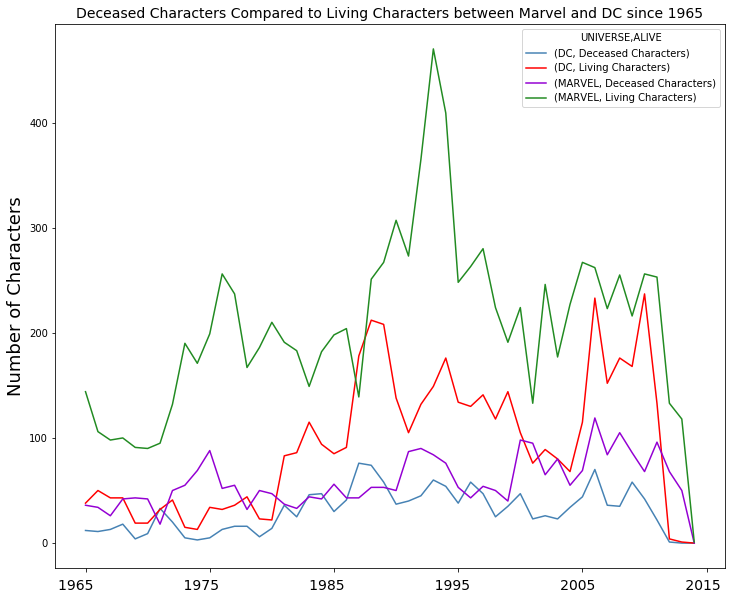

In [15]:
# Using several variables (including one nested variable), I filter out all 'ND' data from the ALIVE and FIRST_YEAR
# columns, and remove all data from before 1965 since they were very insignificant. 
alive_ND = superHero.drop(superHero[superHero.ALIVE == "ND"].index)

firstyear_ND = superHero.drop(superHero[superHero.FIRST_YEAR == "ND"].index)
domain = firstyear_ND.drop(firstyear_ND[firstyear_ND.FIRST_YEAR <= "1964"].index)

# Using the Pandas crosstab function, I initialize a variable 'deceased' to compare the UNIVERSE and ALIVE columns from
# the CSV file to the FIRST_YEAR column.
deceased = pan.crosstab(index = domain["FIRST_YEAR"], columns = [domain["UNIVERSE"], alive_ND["ALIVE"]])

my_colors = ["steelblue", "red", "darkviolet", "forestgreen"]

# With the Matplotlib visualization function, I take my 'deceased' variable and create a line plot out of it.
# I initialize all my title and axes labels (as well as take a unique approach to naming the x-axis in light of
# current bugs and errors with Matplotlib and Pandas), and show the plot visualization!
deceased.plot(kind = 'line', color = my_colors, sharex=False)
plot.title("Deceased Characters Compared to Living Characters between Marvel and DC since 1965", fontsize = 14)
# With the x-axis label below, the years were not showing, so rather than put a proper x-axis title, I decided
# to find a way to plot the years intervaled by decades since 1965. 
plot.xlabel("1965                    1975                    1985                    1995                    2005                    2015", fontsize = 14)
plot.ylabel("Number of Characters", fontsize = 18)
plot.show()